In [50]:
import numpy as np
import mip 
import matplotlib.pyplot as plt
from matplotlib import colors

In [51]:
def is_valid_l(i,j,k):
    if(i[0] == j[0] and abs(i[1] - j[1]) == 1):
        return (k[1] == i[1] and abs(k[0] - j[0]) == 1) or (k[1] == j[1] and abs(k[0] - i[0]) == 1)
    if(i[1] == j[1] and abs(i[0] - j[0]) == 1):
        return (k[0] == i[0] and abs(k[1] - j[1]) == 1) or (k[0] == j[0] and abs(k[1] - i[1]) == 1)
    return False
n = 5
squares = [(i+1,j+1) for i in range(n) for j in range(n)]
print(squares)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]


In [52]:
Ls = set() #L set just to make sur we don't have duplicate l's 
L = []
nbLs = 0
for i in squares:
    for j in squares:
        for k in squares:
            if(is_valid_l(i,j,k)):
                Ls.add(frozenset({i,j,k}))
                if(len(Ls) > nbLs):
                    L.append([i,j,k])
                nbLs = len(Ls)
print(len(L))

64


In [53]:
m = mip.Model()
variables = [] 
for l in range(len(L)):
    variables.append(m.add_var(name="x"+str(l),var_type=mip.BINARY)) 
for s in squares: 
    m+= mip.xsum(variables[l] for l in range(len(L)) if(s == L[l][0] or s == L[l][1] or s == L[l][2] )) <= 1
m.objective = mip.maximize(mip.xsum(v for v in variables))
m.verbose = 0
m.optimize(max_seconds=300)


<OptimizationStatus.OPTIMAL: 0>

In [54]:
print(f"m.objective_value : {m.objective_value}")

m.objective_value : 8.0


In [55]:
square = np.zeros((n,n))
color = 1
for v in variables:
    i = int(v.name[1:])
    if(v.x == 1):
        square[L[i][0][0]-1,L[i][0][1]-1] = color
        square[L[i][1][0]-1,L[i][1][1]-1] = color
        square[L[i][2][0]-1,L[i][2][1]-1] = color
        color +=1
#square = square/(len(L) + 1)

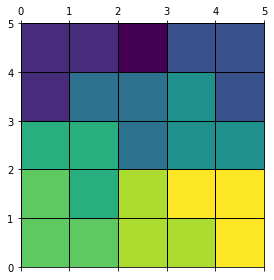

In [56]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
for x in range(n+1):
    ax.axhline(x, lw=1, color='k', zorder=5)
    ax.axvline(x, lw=1, color='k', zorder=5)
    
ax.matshow(square,extent=[0, n, 0, n], zorder=0)